<a href="https://colab.research.google.com/github/chandra-sekar-1983/RegressionAnalysis/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


RandomState(MT19937)
[ 16.24345364  -6.11756414  -5.28171752 -10.72968622   8.65407629
 -23.01538697  17.44811764  -7.61206901   3.19039096  -2.49370375
  14.62107937 -20.60140709  -3.22417204  -3.84054355  11.33769442
 -10.99891267  -1.72428208  -8.77858418   0.42213747   5.82815214
 -11.00619177  11.4472371    9.01590721   5.02494339   9.00855949
  -6.83727859  -1.22890226  -9.35769434  -2.6788808    5.30355467
  -6.91660752  -3.96753527  -6.871727    -8.45205641  -6.71246131
  -0.12664599 -11.17310349   2.34415698  16.59802177   7.42044161
  -1.91835552  -8.87628964  -7.47158294  16.92454601   0.50807755
  -6.36995647   1.90915485  21.00255136   1.20158952   6.1720311 ]
[ 27.78707759 -17.58737812 -16.70595324 -26.80871517  12.09925835
 -50.44415075  30.7352187  -19.29303594   1.66636925  -9.10226635
  23.4877608  -44.94994603 -10.93541426 -12.97917993  18.16390699
 -27.07339706  -7.31693476 -21.03735154  -1.97014966   5.25980794
 -28.45649735  17.39000833  13.19185148   5.9260557   

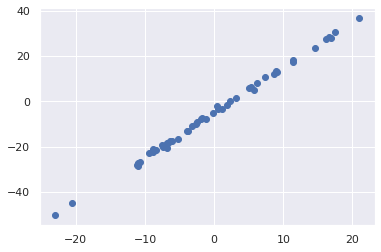

In [23]:
### set seed using random state 
rng=np.random.RandomState(1)
print(rng)
x=10*rng.randn(50)
print(x)
y = 2 * x - 5 + rng.randn(50)
print(y)
plt.scatter(x, y);

slope and coefficients are 0.0 and 2.011344593884048


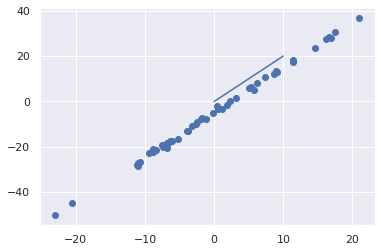

In [51]:
### Fit sci-kits estimator to this line - without intercept
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=False)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)

plt.plot(xfit, yfit);
## printing slope and coefficents
print(f"slope and coefficients are {model.intercept_} and {model.coef_[0]}")



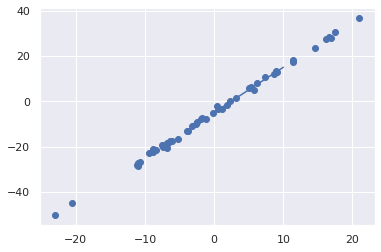

In [49]:
### Fit sci-kits estimator to this line with intercept
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)

plt.plot(xfit, yfit);


In [50]:
## printing slope and coefficents
print(f"slope and coefficients are {model.intercept_} and {model.coef_[0]}")

slope and coefficients are -4.853783738339677 and 1.9981803125043678


In [53]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.0
[ 1.52587196 -1.97000441  1.03220321]


In [55]:
X = 10 * rng.rand(100, 3)
X

array([[6.74564024, 7.99776537, 0.80529527],
       [2.3170231 , 2.07625662, 9.17333563],
       [7.11314518, 5.53884611, 3.04517988],
       [8.34854048, 4.35305958, 9.23456215],
       [7.06051804, 4.78031308, 1.26210104],
       [9.7604355 , 1.5983365 , 2.02602125],
       [4.31181755, 4.04201906, 1.46751481],
       [7.29318919, 1.88745067, 6.43895644],
       [7.54305951, 2.10732392, 6.00954248],
       [7.48928375, 6.38218711, 5.97127303],
       [2.95482286, 7.31606471, 9.4530844 ],
       [4.2556139 , 7.82181817, 0.5614104 ],
       [8.35271602, 1.92250017, 3.95096869],
       [3.00081046, 0.80103644, 9.04631003],
       [3.70154178, 5.30697438, 4.94116266],
       [1.32161142, 2.06454059, 0.76188809],
       [5.079217  , 2.61549552, 3.57061609],
       [1.08065329, 7.8755184 , 1.06583877],
       [9.85708824, 1.77161164, 5.72405112],
       [0.44845335, 7.8711629 , 1.89605948],
       [5.27903978, 7.40077543, 1.49931485],
       [5.51087174, 2.16617208, 7.59196049],
       [7.

In [0]:
### Polynomial basis functions - generating higher order features

In [63]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly=PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

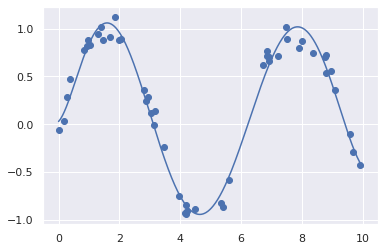

In [68]:
### Making the pipeline
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);


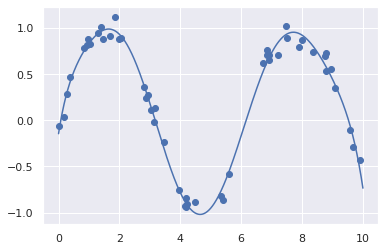

In [74]:
### Making the pipeline
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(9),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [0]:
## Gaussian basis functions
## For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.

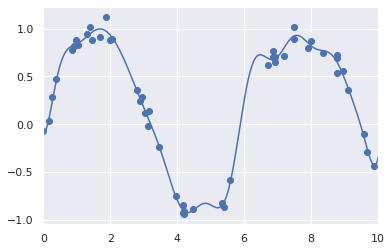

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.36681e-21): result may not be accurate.
  overwrite_a=True).T


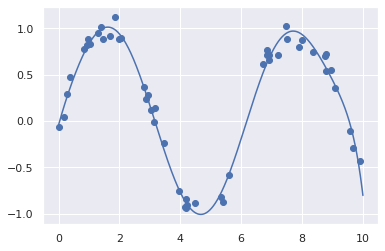

In [88]:
### Ridge regression to control overfit
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.01))

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

model.fit(x[:, np.newaxis], y)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.59221e-17): result may not be accurate.
  overwrite_a=True).T


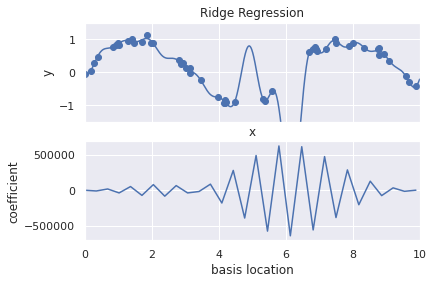

In [90]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0))
basis_plot(model, title='Ridge Regression')

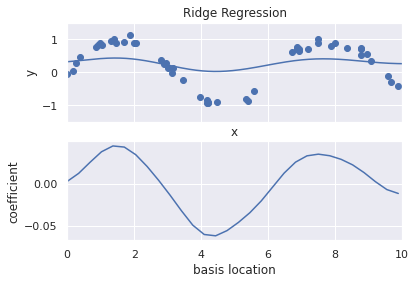

In [91]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=100))
basis_plot(model, title='Ridge Regression')

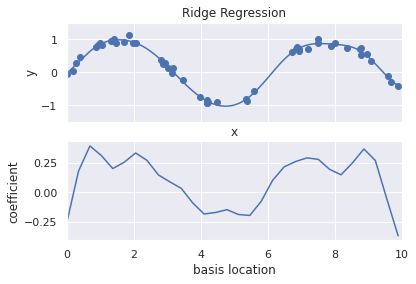

In [92]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.05))
basis_plot(model, title='Ridge Regression')

Lasso Regression - L1 Norm

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870488944, tolerance: 0.002065280097246271
  positive)


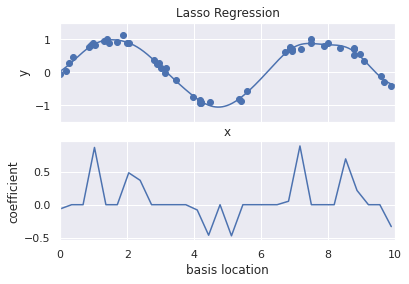

In [93]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')